In [179]:
import pandas as pd 
import numpy as np 
import pandas_profiling as pp
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd
%matplotlib inline

depth- Depth of the event in kilometers. The depth where the earthquake begins to rupture. This depth may be relative to the WGS84 geoid, mean sea-level, or the average elevation of the seismic stations which provided arrival-time data for the earthquake location.

depthError- Uncertainty of reported depth of the event in kilometers.

dmin- Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

gap- The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties.

horizontalError- Uncertainty of reported location of the event in kilometers.

id- A unique identifier for the event. This is the current preferred id for the event, and may change over time. See the "ids" GeoJSON format property.

latitude- Decimal degrees latitude. Negative values for southern latitudes.

locationSource- The network that originally authored the reported location of this event.

longitude- Decimal degrees longitude. Negative values for western longitudes.

mag- The magnitude for the event. Earthquake magnitude is a measure of the size of an earthquake at its source.

magError- Uncertainty of reported magnitude of the event.

magNst- The total number of seismic stations used to calculate the magnitude for this earthquake.

magSource- Network that originally authored the reported magnitude for this event.

magType- The method or algorithm used to calculate the preferred magnitude for the event.

net- The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.

nst- The total number of seismic stations used to determine earthquake location.

place- Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name. If there is no nearby city within 300 kilometers (or if the nearby cities database is unavailable for some reason), the Flinn-Engdahl (F-E) seismic and geographical regionalization scheme is used.

rms-The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data.

status- Indicates whether the event has been reviewed by a human. Status is either automatic or reviewed. Automatic events are directly posted by automatic processing systems and have not been verified or altered by a human. Reviewed events have been looked at by a human. The level of review can range from a quick validity check to a careful reanalysis of the event.

time- Time when the event occurred. Times are reported in milliseconds since the epoch ( 1970-01-01T00:00:00.000Z), and do not include leap seconds. In certain output formats, the date is formatted for readability.

type- Type of seismic event.

updated- Time when the event was most recently updated. Times are reported in milliseconds since the epoch.

In [198]:
df = pd.read_csv('./data/USGS earthquake data.csv')
#df.profile_report()
#df.describe()

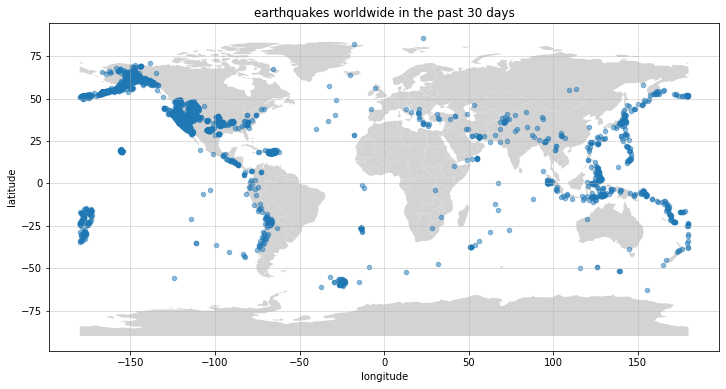

In [182]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) #geopandas worldmap 

fig, ax = plt.subplots(figsize=(12,10))
worldmap.plot(color='lightgrey', ax=ax) #plot map 
df.plot(x="longitude", y="latitude", kind="scatter", alpha=0.5, title="earthquakes worldwide in the past 30 days", ax=ax) #plot quake coordinates
ax.grid(alpha=0.5) #add grid 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='depth', ylabel='mag'>

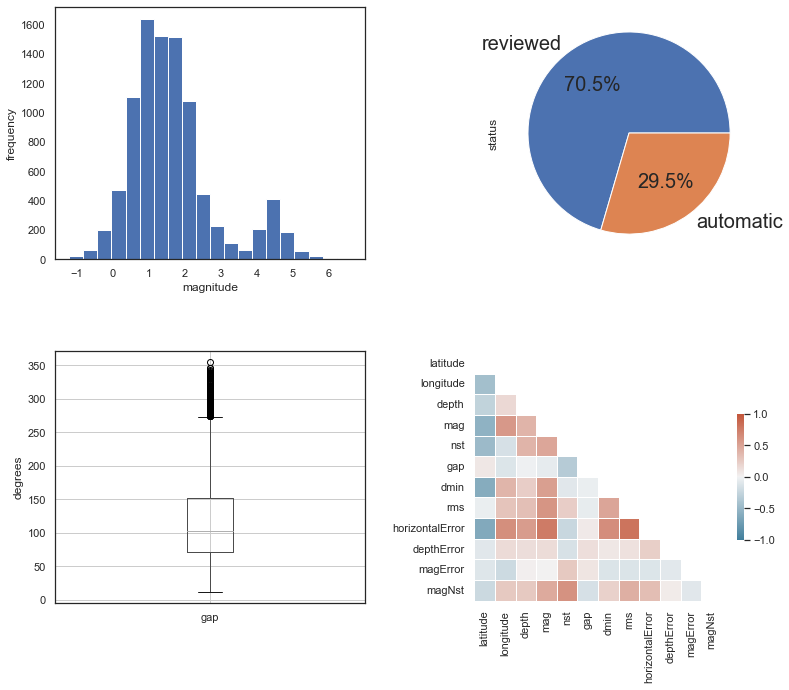

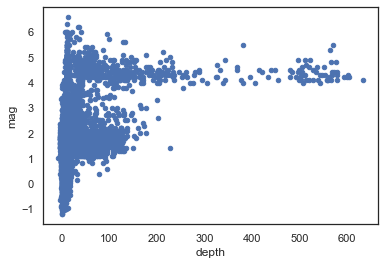

In [201]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

ax[0,0].hist(df['mag'], bins=20)
ax[0,0].set_xlabel('magnitude'), ax[0,0].set_ylabel('frequency') #histogram of magnitude 

df['status'].value_counts().plot(kind='pie', figsize=(12,10), autopct='%1.1f%%', fontsize=20, ax=ax[0,1]) # pie chart of reviewed vs automated

df.boxplot(['gap'], ax=ax[1,0]) 
ax[1,0].set_ylabel('degrees') #boxplot showing distribution of gap values 

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #correlation heatmap

fig, ax = plt.subplots()
df.plot(kind='scatter', x='depth', y='mag', ax=ax) #scatterplot showing magnitude vs depth